In [1]:
# data manipulation
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# math
import numpy as np

In [2]:
folder_path = 'data'

crniche = 'crniche.csv'

In [3]:
def read_csv_file_by_location(location):
    return pd.read_csv(f'{folder_path}/{location}', parse_dates=['date_time'], index_col='date_time')

In [4]:
def get_period_values(dataset, from_date, to_date, feature=None):
    if feature is None:
        return dataset[from_date:to_date]
    return dataset[from_date:to_date][feature]

In [5]:
def plot_line_figures(df_data):
    plt.figure(figsize=(15,8))
    for elem in df_data:
        sns.lineplot(data=elem)

## Crniche

In [6]:
df_crniche = read_csv_file_by_location(crniche)

In [7]:
df_pre_covid_pm10 = get_period_values(df_crniche, "2020-01-01 00:00:00", "2020-03-01 00:00:00", "pm10")
df_covid_period_pm10 = get_period_values(df_crniche, "2020-03-10 00:00:00", "2020-05-20 00:00:00", "pm10")
df_post_covid_period_pm10 = get_period_values(df_crniche, "2020-05-20 00:00:00", "2020-08-20 00:00:00", "pm10")

df_covid_period_pm10_last_year = get_period_values(df_crniche, "2019-03-10 00:00:00", "2019-05-20 00:00:00", "pm10")

In [8]:
df_pre_covid_noise = get_period_values(df_crniche, "2020-01-01 00:00:00", "2020-03-01 00:00:00", "noise")
df_covid_period_noise = get_period_values(df_crniche, "2020-03-10 00:00:00", "2020-05-20 00:00:00", "noise")
df_post_covid_period_noise = get_period_values(df_crniche, "2020-05-20 00:00:00", "2020-08-20 00:00:00", "noise")

df_covid_period_noise_last_year = get_period_values(df_crniche, "2019-03-10 00:00:00", "2019-05-20 00:00:00", "noise")

### Pre-Covid period

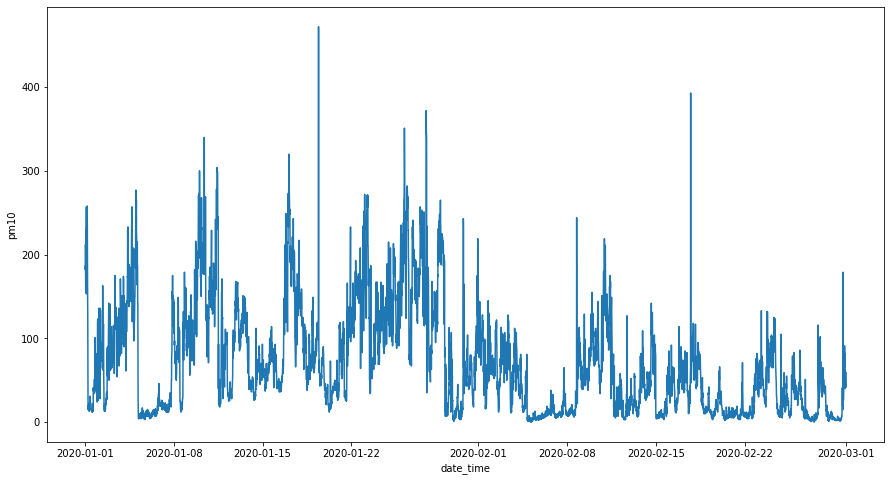

In [9]:
# precovid
plot_line_figures([df_pre_covid_pm10])

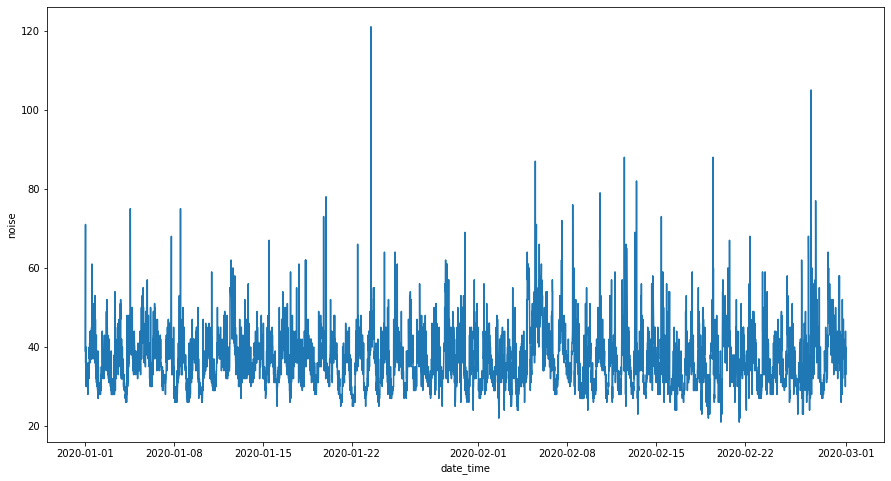

In [10]:
# precovid
plot_line_figures([df_pre_covid_noise])

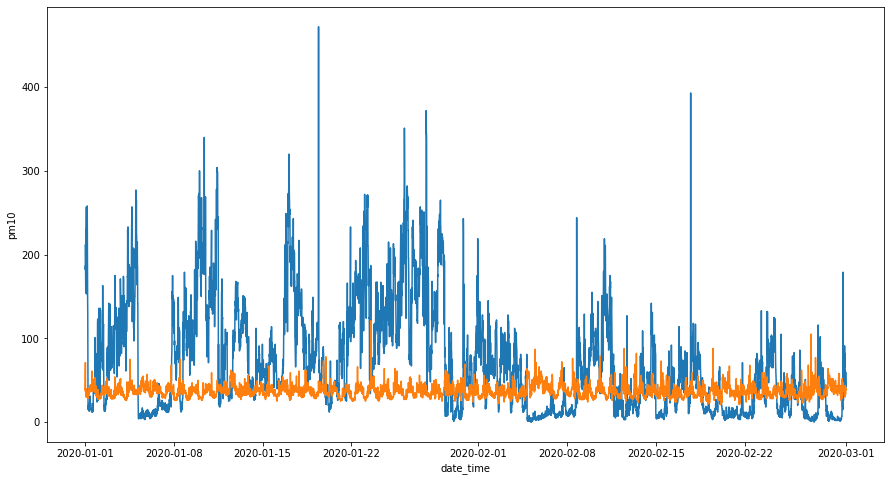

In [11]:
# precovid
plot_line_figures([df_pre_covid_pm10, df_pre_covid_noise])

### Covid period

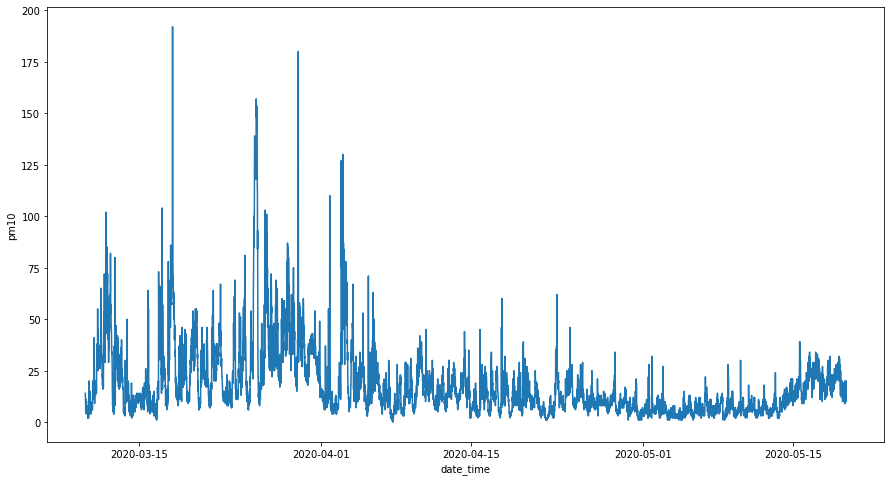

In [12]:
# covid
plot_line_figures([df_covid_period_pm10])

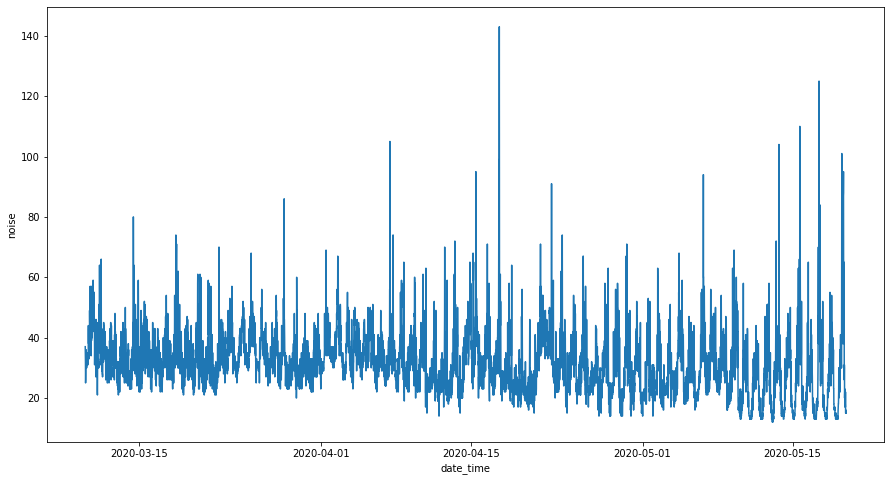

In [13]:
# covid
plot_line_figures([df_covid_period_noise])

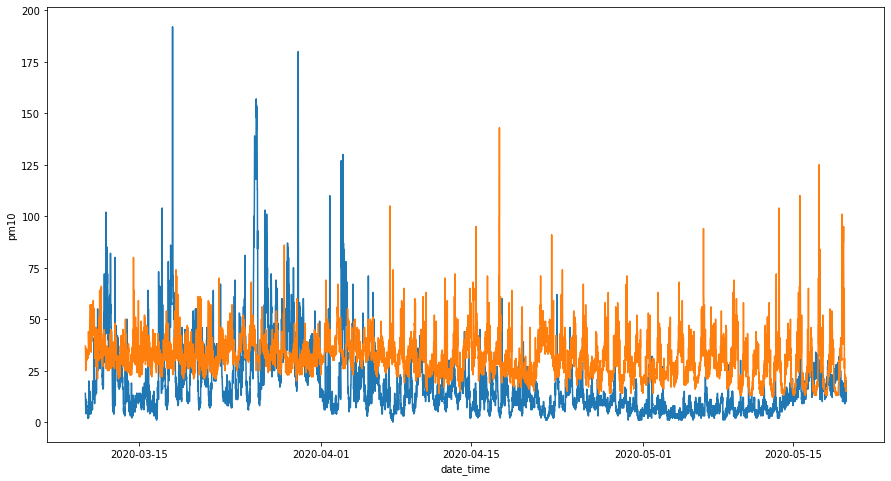

In [14]:
# covid
plot_line_figures([df_covid_period_pm10, df_covid_period_noise])

### Post-Covid period

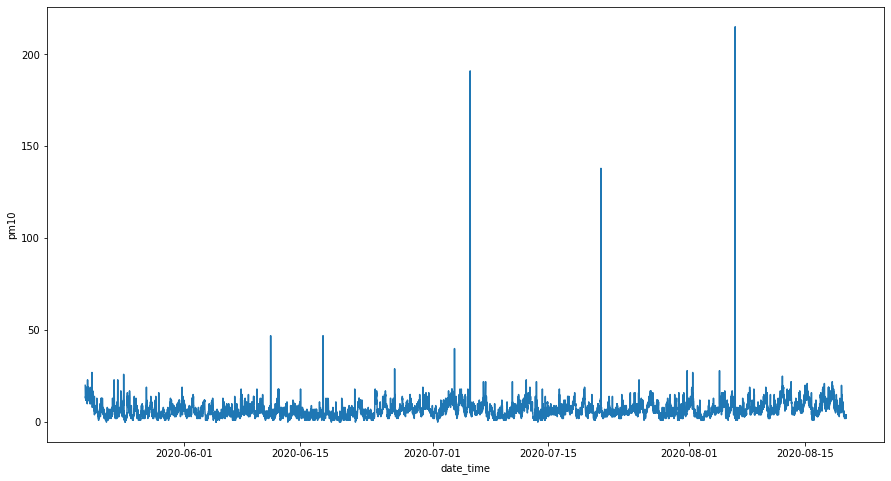

In [15]:
# postcovid
plot_line_figures([df_post_covid_period_pm10])

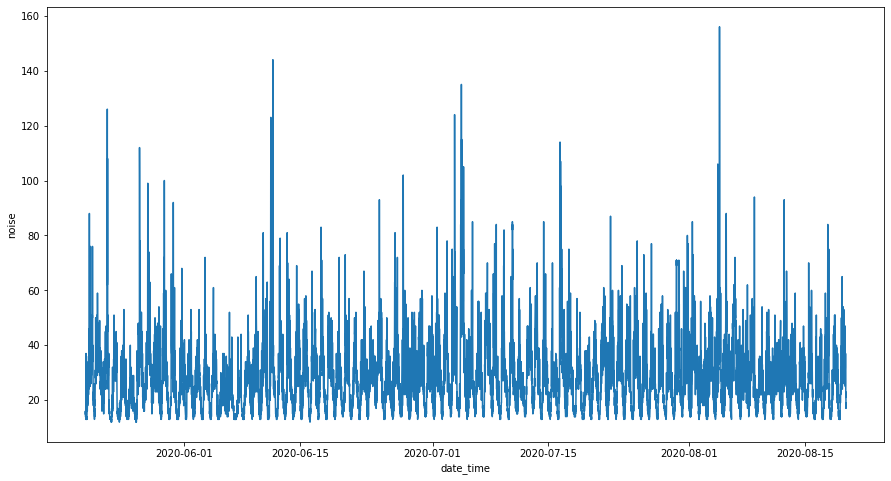

In [16]:
# postcovid
plot_line_figures([df_post_covid_period_noise])

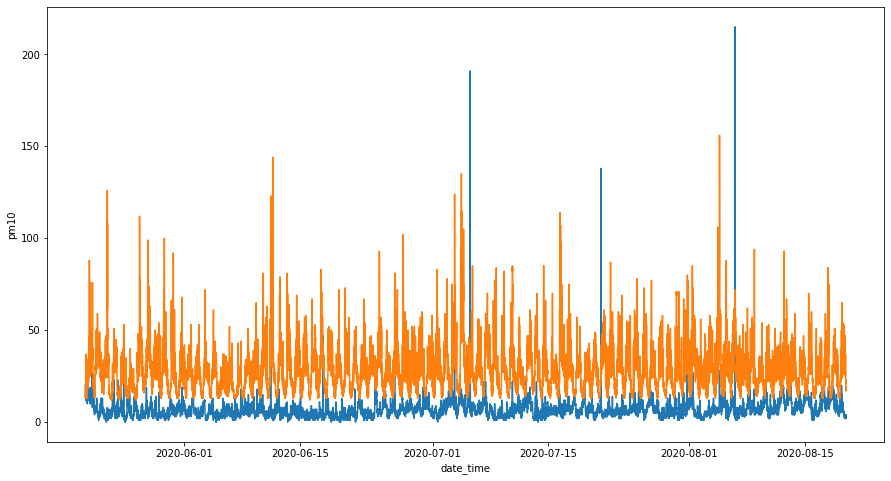

In [17]:
# postcovid
plot_line_figures([df_post_covid_period_pm10, df_post_covid_period_noise])

### Last year quarantine period

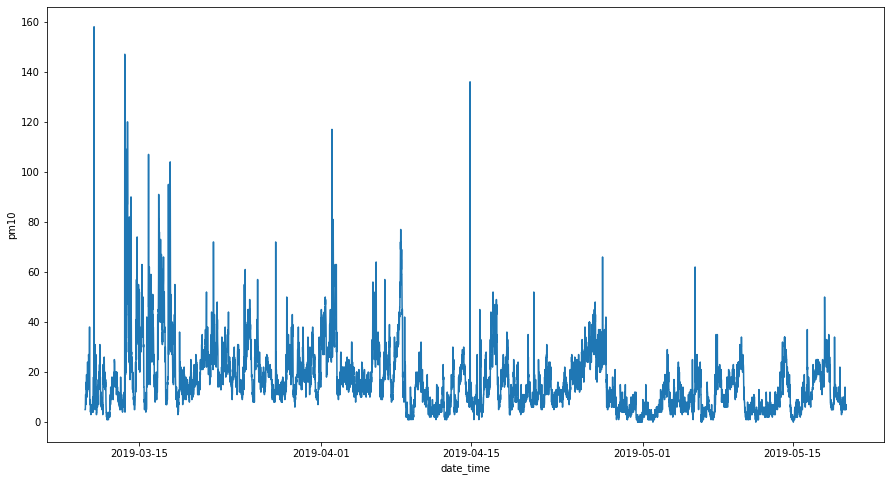

In [18]:
# last year
plot_line_figures([df_covid_period_pm10_last_year])

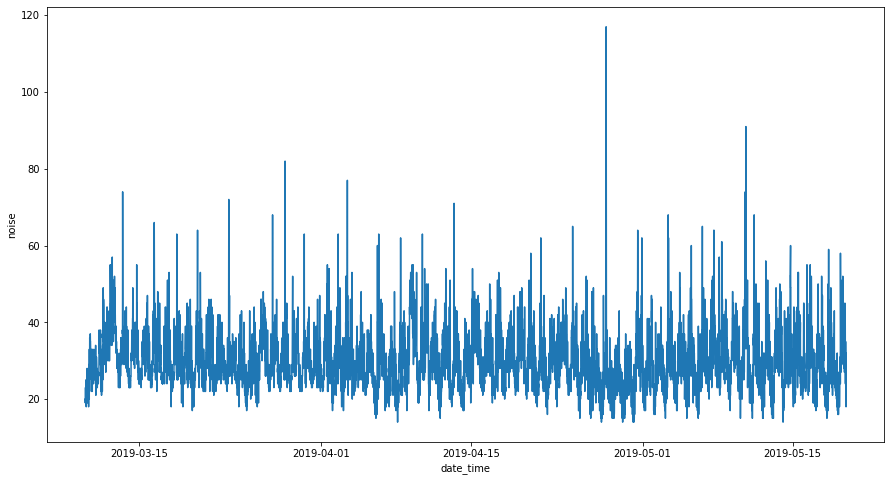

In [19]:
# last year
plot_line_figures([df_covid_period_noise_last_year])

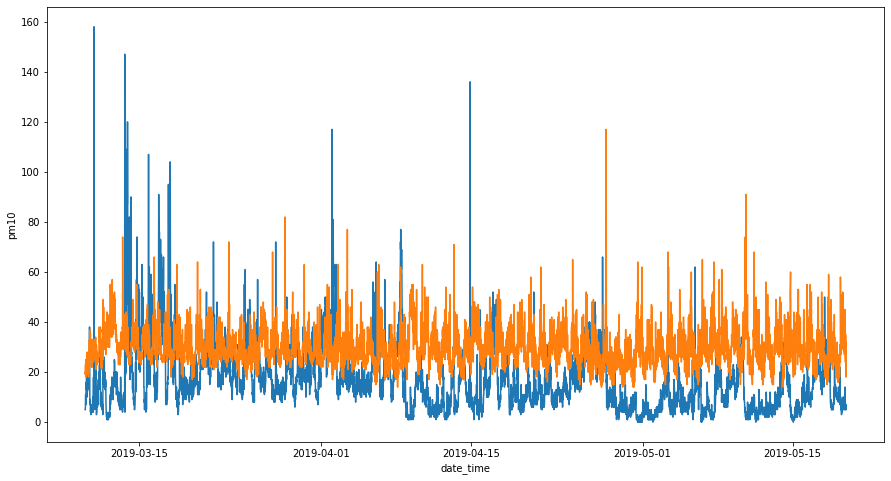

In [20]:
# last year
plot_line_figures([df_covid_period_pm10_last_year, df_covid_period_noise_last_year])

### Correlation and mean

In [21]:
pm10_np = df_crniche['pm10'].to_numpy()
pm10_np = np.where(np.isnan(pm10_np), 0, pm10_np)
noise_np = df_crniche['noise'].to_numpy()

In [22]:
pearsons_coefficient = np.corrcoef(pm10_np, noise_np)
pearsons_coefficient

array([[1.        , 0.08710182],
       [0.08710182, 1.        ]])

In [23]:
{"pre_covid_pm10": df_pre_covid_pm10.mean(),
 "covid_period_pm10": df_covid_period_pm10.mean(),
 "last_year_quarantine_period": df_covid_period_pm10_last_year.mean(),
 "post_covid_pm10": df_post_covid_period_pm10.mean()}

{'pre_covid_pm10': 70.53758028120119,
 'covid_period_pm10': 17.61155933695174,
 'last_year_quarantine_period': 16.47322869297345,
 'post_covid_pm10': 6.599230159628665}